In [21]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
afc = pd.read_csv('afl.csv')
afc.rename(columns={'W-L%':'WPL'}, inplace=True)
afc.head()


,Tm,W,L,T,WPL,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS,TG
0,New England Patriots,8,3,0,0.727,307,249,58,5.3,-0.9,4.4,3.3,1.0,11
1,Miami Dolphins,5,6,0,0.455,223,283,-60,-5.5,-1.7,-7.2,-5.1,-2.1,11
2,Buffalo Bills,4,7,0,0.364,161,272,-111,-10.1,1.5,-8.6,-8.3,-0.3,11
3,New York Jets,3,8,0,0.273,221,281,-60,-5.5,-1.8,-7.3,-4.0,-3.3,11
4,Pittsburgh Steelers,7,3,1,0.682,316,249,67,6.1,1.5,7.6,5.2,2.5,11


In [40]:
nfc = pd.read_csv('nfc.csv')
nfc.rename(columns={'W-L%':'WPL'}, inplace=True)
nfc.head()

,Tm,W,L,T,WPL,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS,TG
0,Washington Redskins,6,5,0,0.545,220,229,-9,-0.8,-0.2,-1.0,-5.3,4.2,11
1,Dallas Cowboys,6,5,0,0.545,234,213,21,1.9,-0.9,1.0,-1.7,2.7,11
2,Philadelphia Eagles,5,6,0,0.455,230,253,-23,-2.1,-0.4,-2.5,-4.1,1.6,11
3,New York Giants,3,8,0,0.273,237,288,-51,-4.6,0.0,-4.6,-2.3,-2.4,11
4,Chicago Bears,8,3,0,0.727,317,211,106,9.6,-3.6,6.1,3.5,2.6,11


In [31]:
#AFC
X = afc.W.values.reshape(-1, 1)
y = afc.PF.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (16, 1) (16, 1)


array([[8],
       [5],
       [4],
       [3],
       [7],
       [6],
       [5],
       [4],
       [8],
       [6],
       [5],
       [3],
       [9],
       [8],
       [5],
       [2]], dtype=int64)

In [41]:
#NFC
Xtwo = nfc.W.values.reshape(-1, 1)
ytwo = nfc.PF.values.reshape(-1, 1)

print("Shape: ", Xtwo.shape, ytwo.shape)
Xtwo

Shape:  (16, 1) (16, 1)


array([[ 6],
       [ 6],
       [ 5],
       [ 3],
       [ 8],
       [ 6],
       [ 4],
       [ 4],
       [10],
       [ 6],
       [ 4],
       [ 4],
       [10],
       [ 6],
       [ 2],
       [ 2]], dtype=int64)

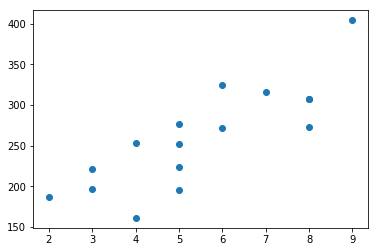

In [32]:
#AFC
plt.scatter(X, y)

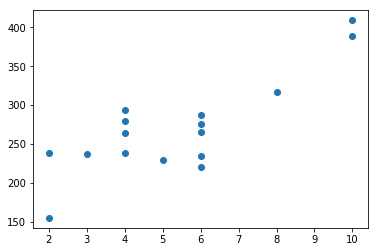

In [44]:
#NFC
plt.scatter(Xtwo,ytwo)

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X, y)

predicted = model.predict(X)

mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")


print('AFC Weight coefficients: ', model.coef_)
print('AFC y-axis intercept: ', model.intercept_)

Mean Squared Error (MSE): 1180.15234375
R-squared (R2 ): 0.6820281978310656
AFC Weight coefficients:  [[25.15625]]
AFC y-axis intercept:  [122.140625]


In [78]:
modeltwo = LinearRegression()

modeltwo.fit(Xtwo, ytwo)

predicted = modeltwo.predict(Xtwo)

mse = mean_squared_error(ytwo, predicted)
r2 = r2_score(ytwo, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

print('NFC Weight coefficients: ', modeltwo.coef_)
print('NFC y-axis intercept: ', modeltwo.intercept_)


Mean Squared Error (MSE): 1172.8732193732192
R-squared (R2 ): 0.6788614587821409
NFC Weight coefficients:  [[21.26210826]]
NFC y-axis intercept:  [156.59116809]


In [79]:
afcsc=model.score(X,y)
nfcsc=modeltwo.score(Xtwo,ytwo)

print(f"AFC score:{afcsc}")
print(f"NFC score:{nfcsc}")

AFC score:0.6820281978310656
NFC score:0.6788614587821409


In [80]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"AFC Min X Value: {x_min}")
print(f"AFC Max X Value: {x_max}")

AFC Min X Value: [[2]]
AFC Max X Value: [[9]]


In [81]:
x_mintwo = np.array([[Xtwo.min()]])
x_maxtwo = np.array([[Xtwo.max()]])
print(f"NFC Min X Value: {x_mintwo}")
print(f"NFC Max X Value: {x_maxtwo}")

NFC Min X Value: [[2]]
NFC Max X Value: [[10]]


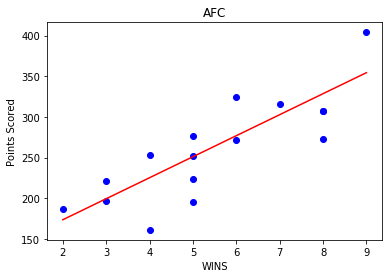

In [106]:
#AFC LR

y_min = model.predict(x_min)
y_max = model.predict(x_max)

plt.scatter(X, y, c='blue')
plt.xlabel("WINS")
plt.ylabel("Points Scored")
plt.title("AFC")
#plt.xticks(afl.Tm)
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

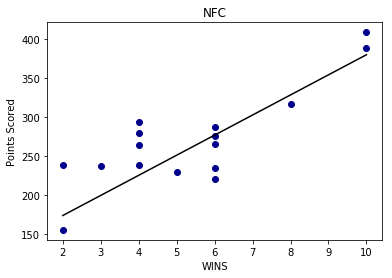

In [107]:
#NFC LR

y_mintwo = model.predict(x_mintwo)
y_maxtwo = model.predict(x_maxtwo)
plt.xlabel("WINS")
plt.ylabel("Points Scored")
plt.title("NFC")
plt.scatter(Xtwo, ytwo, c='darkblue')
#plt.xticks(afl.Tm)
plt.plot([x_mintwo[0], x_maxtwo[0]], [y_mintwo[0], y_maxtwo[0]], c='black')

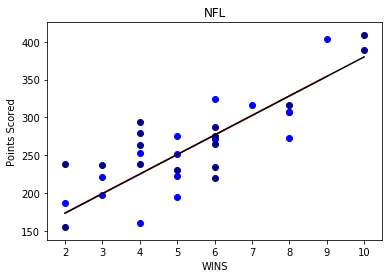

In [108]:
#NFL CHART

plt.scatter(X, y, c='blue')
plt.scatter(Xtwo, ytwo, c='darkblue')
plt.xlabel("WINS")
plt.ylabel("Points Scored")
plt.title("NFL")


plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.plot([x_mintwo[0], x_maxtwo[0]], [y_mintwo[0], y_maxtwo[0]], c='black')

In [93]:
#AFC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.656560247206178

In [94]:
#NFC
X_traintwo, X_testtwo, y_traintwo, y_testtwo = train_test_split(Xtwo, ytwo, random_state=42)

modeltwo.fit(X_traintwo, y_traintwo)

modeltwo.score(X_testtwo, y_testtwo)

-9.78524880092155